In [1]:
import pandas as pd
import smogn
import seaborn


In [2]:
df = pd.read_csv("/Users/admin/Downloads/parklane_combined_edited.csv", index=False)
# filter where hr or hb is  not 0
df = df[(df['sys_hr'] != 0) | (df['sys_hb'] != 0)]
df = df[(df['h_chwst'] >=5) & (df['h_chwst'] <=20)]
df = df[(df['h_chwrt'] >=5) & (df['h_chwrt'] <=25)]
df = df[(df['pchwp_1_kw'] >=1.2) & (df['pchwp_1_kw'] <=5)]
# unsure of pchwp_2 kw filtering
#df = df[(df['pchwp_2_kw'] >=1.2) & (df['pchwp_2_kw'] <=5)]
df = df[(df['h_chwf'] >= 0) & (df['h_chwf'] <= 1500)]
df = df[(df['cwp_1_kw'] > 0) & (df['cwp_1_kw'] <=25)]
df = df[(df['cwp_2_kw'] > 0) & (df['cwp_2_kw'] <=25)]
df = df[(df['h_chwf'] >0) & (df['h_chwf'] <=1500)]
df = df[(df['h_cwst']>=20) & (df['h_cwst']<=32)]
df = df[(df['h_cwrt']>=20) & (df['h_cwrt']<=40)]
df = df[(df['ch_1_kwe']>=0) & (df['ch_1_kwe']<=350)]
df = df[(df['ch_2_kwe']>=0) & (df['ch_2_kwe']<=350)]
df = df[(df['ct_1_kw']>=0) & (df['ct_1_kw']<=15)]
df = df[(df['ct_2_kw']>=0) & (df['ct_2_kw']<=15)]
df = df[(df['sys_cl']>=200) & (df['sys_cl']<=500)]
df = df[(df['sys_hr']>0) & (df['sys_hr']<=1000)]
df = df[(df['sys_kw']>0) & (df['sys_kw']<=400)]
fil_df = df[(df['ch_sysef']>=0.4) & (df['ch_sysef']<=0.7)]

# replace NaN values with 0? median imputation
fil_df = fil_df.fillna(0)

# creating Lift Column, Lift: [h_cwrt-h_chwst]
fil_df['lift'] = fil_df['h_cwrt'] - fil_df['h_chwst']
fil_df['ct_tot_kw'] = fil_df['ct_1_kw'] + fil_df['ct_2_kw']
# both chillers running
fil_df['ch_run'] = (fil_df['ch_1_kwe']>=2) & (fil_df['ch_2_kwe']>=2)
fil_df['ch_run'] = fil_df['ch_run'].astype(int)

# filtering additional columns
fil_df = fil_df[(fil_df['ct_tot_kw']>=2) & (fil_df['ct_tot_kw']<=30)]
fil_df = fil_df[(fil_df['lift']>=18) & (fil_df['lift']<=30)]

print("total number of rows after filter is {}".format(len(fil_df)))

# selecting related features only
ch_sysef_df = fil_df[['ch_sysef', 'lift', 'sys_cl', 'ct_tot_kw', 'ch_run', 'h_cwst']]


total number of rows after filter is 211004


In [15]:
df_test = ch_sysef_df.head(500).drop("ch_run", axis=1)

In [16]:
df_test

,ch_sysef,lift,sys_cl,ct_tot_kw,h_cwst
646,0.497447,19.139454,352.233795,7.056000,26.070417
648,0.550988,18.783153,349.504547,7.088001,26.830719
649,0.570091,19.933795,360.257111,7.104001,27.225933
650,0.570109,20.829254,370.950195,7.072001,27.347572
651,0.572669,21.348466,374.542725,7.056001,27.346157
...,...,...,...,...,...
1143,0.531168,21.950918,227.207016,7.040000,26.339767
1144,0.530676,21.910199,229.068237,6.992000,26.322920
1145,0.503831,22.016368,228.259293,7.056000,26.285017
1146,0.510166,22.032327,232.479553,7.008000,26.304668


In [21]:
df_smogn = smogn.smoter(
    data=df_test,
    y='ch_sysef'
)

IndexError: positional indexers are out-of-bounds

NameError: name 'df_smogn' is not defined

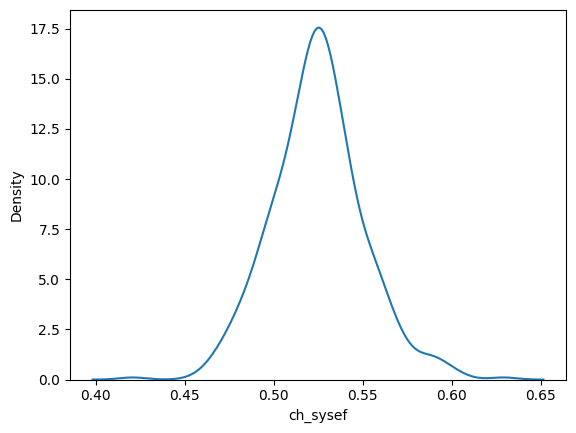

In [22]:
seaborn.kdeplot(df_test['ch_sysef'], label = "Original")
seaborn.kdeplot(df_smogn['ch_sysef'], label = "Modified")

In [ ]:
df_test.tail(5)

,timestamp,sys_kw,sys_cl,sys_hr,sys_hb,sys_eff,ch_sysef,air_eff,h_chwst,h_chwrt,...,ahu_ilp_1_ph,ahu_ilp_1_mvp,ahu_ilp_1_fl,ahu_ilp_1_freq,ahu_ilp_1_rpm,ahu_ilp_2_ph,ahu_ilp_2_mvp,ahu_ilp_2_fl,ahu_ilp_2_freq,ahu_ilp_2_rpm
45,12/3/23 00:45,0.709328,0.029566,0.0,0.0,34.757164,24.025204,9.735613,18.727200,20.662247,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0
46,12/3/23 00:46,0.687797,0.032319,0.0,0.0,34.299107,21.281620,8.918952,18.727200,20.670460,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0
47,12/3/23 00:47,0.704172,0.028261,0.0,0.0,33.031029,24.917057,10.248354,18.740887,20.678671,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0
48,12/3/23 00:48,0.711000,0.025782,0.0,0.0,38.665657,27.577030,11.155897,18.749100,20.690989,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0
49,12/3/23 00:49,0.704250,0.031751,0.0,0.0,31.326689,22.180494,9.169039,18.781950,20.696465,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0


In [ ]:
df_smogn.tail(5)

,timestamp,sys_kw,sys_cl,sys_hr,sys_hb,sys_eff,ch_sysef,air_eff,h_chwst,h_chwrt,...,ahu_ilp_1_ph,ahu_ilp_1_mvp,ahu_ilp_1_fl,ahu_ilp_1_freq,ahu_ilp_1_rpm,ahu_ilp_2_ph,ahu_ilp_2_mvp,ahu_ilp_2_fl,ahu_ilp_2_freq,ahu_ilp_2_rpm
15,12/3/23 00:15,0.695327,0.034649,0.0,0.0,30.188542,20.134741,8.374416,18.588534,20.594900,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0
16,12/3/23 00:15,0.716835,0.032665,0.0,0.0,30.624223,21.125141,8.666452,18.490733,20.537841,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0
17,12/3/23 00:15,0.716674,0.032649,0.0,0.0,30.576803,21.121301,8.677007,18.493102,20.535699,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0
18,12/3/23 00:15,0.716579,0.032559,0.0,0.0,30.602053,21.119396,8.677047,18.493388,20.535535,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0
19,12/3/23 00:15,0.716615,0.032488,0.0,0.0,30.594994,21.081713,8.680865,18.490964,20.535669,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0
